In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
#Loading_dataset
mnist=keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
#Normalize_pixel_values_to_a_standard_range(0-1)
x_train,x_test=x_train/255.0,x_test/255.0

11490434/11490434 [==============================] - 1s 0us/step


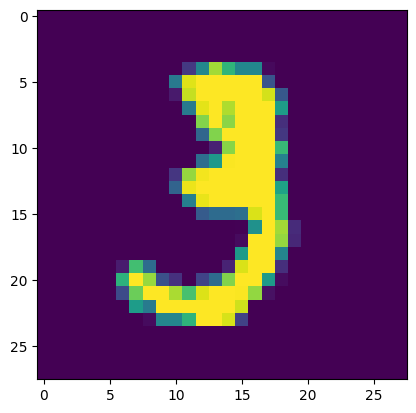

In [ ]:
#Display_image
import matplotlib.pyplot as plt
plt.imshow(x_train[10])

In [ ]:
y_train[10]

3

In [ ]:
model=keras.Sequential([layers.Flatten(input_shape=(28,28)),#input_layer
                        layers.Dense(128,activation='relu'),#hidden_layer
                        layers.Dense(10,activation='softmax')])#output_layer

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,validation_split=0.1,epochs=5)

Epoch 1/5
1688/1688 [==============================] - 17s 9ms/step - loss: 0.2717 - accuracy: 0.9223 - val_loss: 0.1253 - val_accuracy: 0.9668
Epoch 2/5
1688/1688 [==============================] - 12s 7ms/step - loss: 0.1192 - accuracy: 0.9644 - val_loss: 0.1020 - val_accuracy: 0.9668
Epoch 3/5
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0818 - accuracy: 0.9752 - val_loss: 0.0859 - val_accuracy: 0.9728
Epoch 4/5
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0597 - accuracy: 0.9819 - val_loss: 0.0749 - val_accuracy: 0.9785
Epoch 5/5
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0453 - accuracy: 0.9858 - val_loss: 0.0834 - val_accuracy: 0.9767


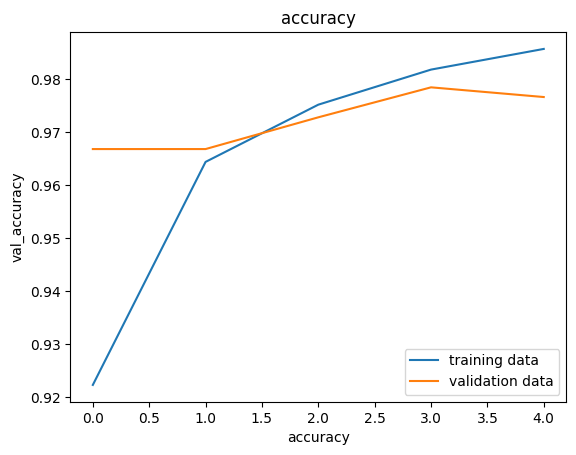

In [ ]:
#accuracy_and_val_accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.xlabel('accuracy')
plt.ylabel('val_accuracy')
plt.legend(['training data','validation data'],loc='lower right')
plt.show()

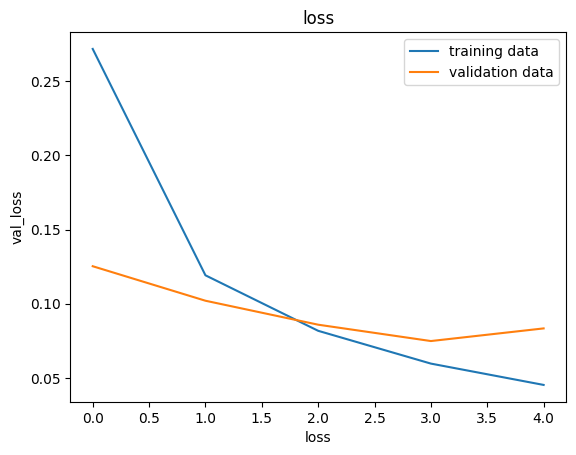

In [ ]:
#loss_and_val_loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.xlabel('loss')
plt.ylabel('val_loss')
plt.legend(['training data','validation data'],loc='upper right')
plt.show()

In [ ]:
y_pred=model.predict(x_test)
y_pred

313/313 [==============================] - 1s 2ms/step


array([[2.9277919e-07, 8.4504876e-07, 8.3649029e-05, ..., 9.9935740e-01,
        2.0388538e-06, 5.5838364e-06],
       [2.9216348e-11, 5.7903994e-06, 9.9999398e-01, ..., 6.4273694e-14,
        6.2803163e-09, 2.6526936e-16],
       [8.6729386e-07, 9.9968982e-01, 6.3861393e-05, ..., 1.8778769e-04,
        4.1288597e-05, 1.7970362e-07],
       ...,
       [2.2745786e-11, 2.5083237e-08, 1.0144214e-08, ..., 3.0931574e-04,
        1.9781014e-06, 6.7621745e-06],
       [2.6804284e-10, 2.0389046e-11, 1.3090968e-11, ..., 1.1010930e-10,
        1.1967012e-06, 2.4071812e-12],
       [1.0454060e-06, 5.3546657e-08, 2.5191619e-07, ..., 4.2334275e-11,
        1.0249923e-10, 1.0598790e-11]], dtype=float32)

In [ ]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
from sklearn.metrics import accuracy_score
#accuracy_score
accuracy_score(y_pred,y_test)

0.9729

Text(0.5, 1.0, 'y_test: 6, y_Pred: 6')

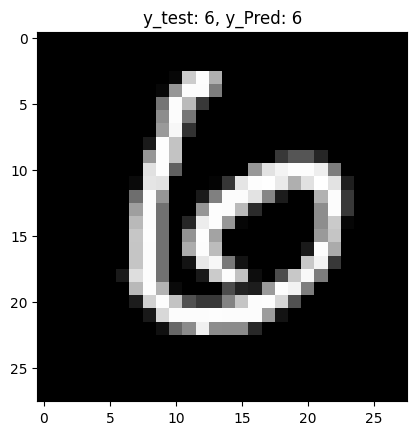

In [ ]:
import matplotlib.pyplot as plt
#random_image_classification
plt.imshow(x_test[11],cmap='gray')
plt.title(f'y_test: {y_test[11]}, y_Pred: {y_pred[11]}')